<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the Problem Statement**

The goal is to predict Zone 1 Power Consumption based on environmental and meteorological factors. The dataset contains 9 columns and 52,584 rows. You need to build an accurate predictive model to optimize power consumption.

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import joblib



In [2]:
# 2. Load Data
df = pd.read_excel("City Power Consumption.xlsx")
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [3]:
# 3.Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [4]:
df.describe()

,S no,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [5]:
df.isnull().sum()

,0
S no,0
Temperature,320
Humidity,25
Wind Speed,71
general diffuse flows,308
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in A Zone,0


In [6]:
# 4. Handle Missing Values (if any)
df = df.dropna()

In [7]:
# Check data types
df.dtypes


,0
S no,int64
Temperature,object
Humidity,object
Wind Speed,float64
general diffuse flows,float64
diffuse flows,float64
Air Quality Index (PM),float64
Cloudiness,int64
Power Consumption in A Zone,float64


In [8]:
# View unique values in a specific column (example: 'Temperature' or others)
df['Temperature'].unique()


array([6.559, 6.414, 6.313, ..., 6.947, 6.758, 6.58], dtype=object)

In [9]:
# Clean all numeric columns (strip units like 'dc', '%', etc.)
def clean_column(col):
    return pd.to_numeric(col.astype(str).str.extract(r'([-+]?\d*\.\d+|\d+)')[0], errors='coerce')

for col in df.columns:
    df[col] = clean_column(df[col])


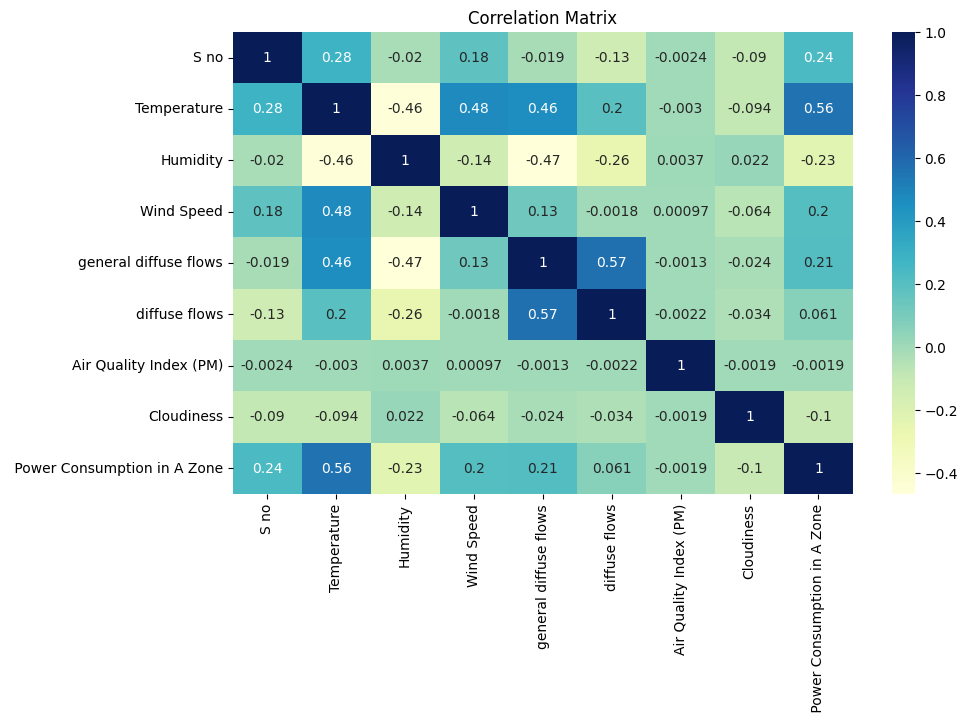

In [10]:
# 5. EDA: Correlation Matrix
# Now try correlation matrix again
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()


**Feature Selection**


In [11]:
df.columns = df.columns.str.strip()


In [12]:
print(df.columns.tolist())


['S no', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness', 'Power Consumption in A Zone']


In [13]:
['S no', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
 'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness', 'Power Consumption in A Zone']


['S no',
 'Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Air Quality Index (PM)',
 'Cloudiness',
 'Power Consumption in A Zone']

In [14]:
X = df.drop(columns=['Power Consumption in A Zone', 'S no'], errors='ignore')
y = df['Power Consumption in A Zone']


In [15]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# 8. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**📈 Model Building & Evaluation**



In [17]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)


In [18]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [19]:
# XGBoost
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(X_train, y_train)
xgb_preds = xgbr.predict(X_test)



 **Model Evaluation Function**

In [25]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))


In [26]:
# Evaluate all models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



Model: Linear Regression
MAE: 5323.172900340368
MSE: 43541991.30757384
RMSE: 6598.6355640824595
R2 Score: 0.3250535916704729

Model: Random Forest
MAE: 3371.4019069912974
MSE: 23624814.57569856
RMSE: 4860.53644937455
R2 Score: 0.633790663530237

Model: XGBoost
MAE: 3957.7769047332376
MSE: 28665552.840115514
RMSE: 5354.022118007687
R2 Score: 0.5556539480349665


In [27]:
# Let's say Random Forest performed best
joblib.dump(rf, "best_power_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']